In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
data = pd.read_csv('wine.data')

In [179]:
data.shape

(177, 14)

In [183]:
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [184]:
data["1"].unique()

array([1, 2, 3], dtype=int64)

In [186]:
data["1"].nunique()

3

In [189]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [190]:
print(x.shape)
print(y.shape)

(177, 13)
(177,)


In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [198]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [199]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [221]:
x_test.shape

(36, 2)

# PCA

In [200]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  # put value equal to None if want to look at the output of all vectors along each feature
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
expl_variance = pca.explained_variance_ratio_

In [201]:
expl_variance     #eigne vectors sorted are then picked up. On combining they are showing 47% of data variance

array([0.3959729 , 0.20698569])

In [202]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
y_pred = clf.predict(x_test)

In [204]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [205]:
cm

array([[13,  1,  0],
       [ 0, 13,  2],
       [ 0,  0,  7]], dtype=int64)

In [222]:
accuracy = (13+13+7)/36
accuracy

0.9166666666666666

In [223]:
from sklearn.metrics import mean_squared_error
acc = mean_squared_error(y_test, y_pred)
acc = np.sqrt(acc)
acc

0.28867513459481287

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


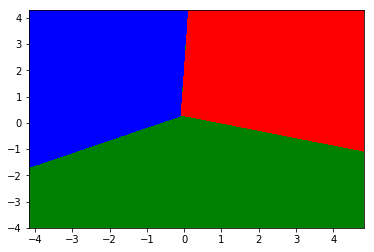

In [237]:
#visualize
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max()+1,step=0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max()+1,step=0.01))
plt.contourf(X1,X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            aplha = 0.75, cmap=ListedColormap(('red','green','blue')))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


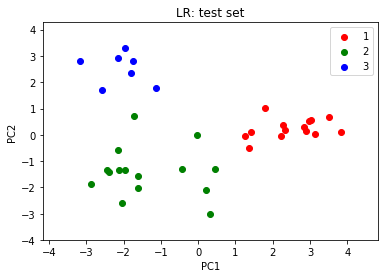

In [238]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title('LR: test set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()